In [178]:
import pandas as pd
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv('./arboles_decision/glass.csv')
df.describe

<bound method NDFrame.describe of       ID       RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO   BAO  FE2O3  TYPE
0      1  1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0     1
1      2  1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0     1
2      3  1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0     1
3      4  1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0     1
4      5  1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0     1
..   ...      ...    ...   ...    ...    ...   ...   ...   ...    ...   ...
209  210  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0     7
210  211  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0     7
211  212  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0     7
212  213  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0     7
213  214  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0     7

[214 rows x 11 columns]>

In [180]:
X = df.drop(['ID', 'TYPE'], axis=1)
X

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [181]:
y = df['TYPE']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: TYPE, Length: 214, dtype: int64

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_train.shape, X_test.shape

((171, 9), (43, 9))

In [183]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    max_features=8,
    random_state=23
)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=8,
                       random_state=23)

In [184]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=8,
                       random_state=23)

[Text(0.6325757575757576, 0.9166666666666666, 'BAO <= 0.335\nentropy = 2.208\nsamples = 171\nvalue = [57, 57, 14, 12, 7, 24]\nclass = 1'),
 Text(0.38636363636363635, 0.75, 'MGO <= 2.56\nentropy = 1.988\nsamples = 147\nvalue = [56.0, 56.0, 14.0, 11.0, 7.0, 3.0]\nclass = 1'),
 Text(0.509469696969697, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'NA2O <= 13.495\nentropy = 1.816\nsamples = 27\nvalue = [0, 7, 0, 11, 7, 2]\nclass = 5'),
 Text(0.09090909090909091, 0.4166666666666667, 'AL2O3 <= 1.295\nentropy = 0.773\nsamples = 13\nvalue = [0, 1, 0, 11, 0, 1]\nclass = 5'),
 Text(0.06060606060606061, 0.25, 'K2O <= 1.41\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 0, 0, 0, 1]\nclass = 2'),
 Text(0.030303030303030304, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]\nclass = 2'),
 Text(0.09090909090909091, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1]\nclass = 7'),
 Text(0.12121212121212122, 0.25, 'entropy 

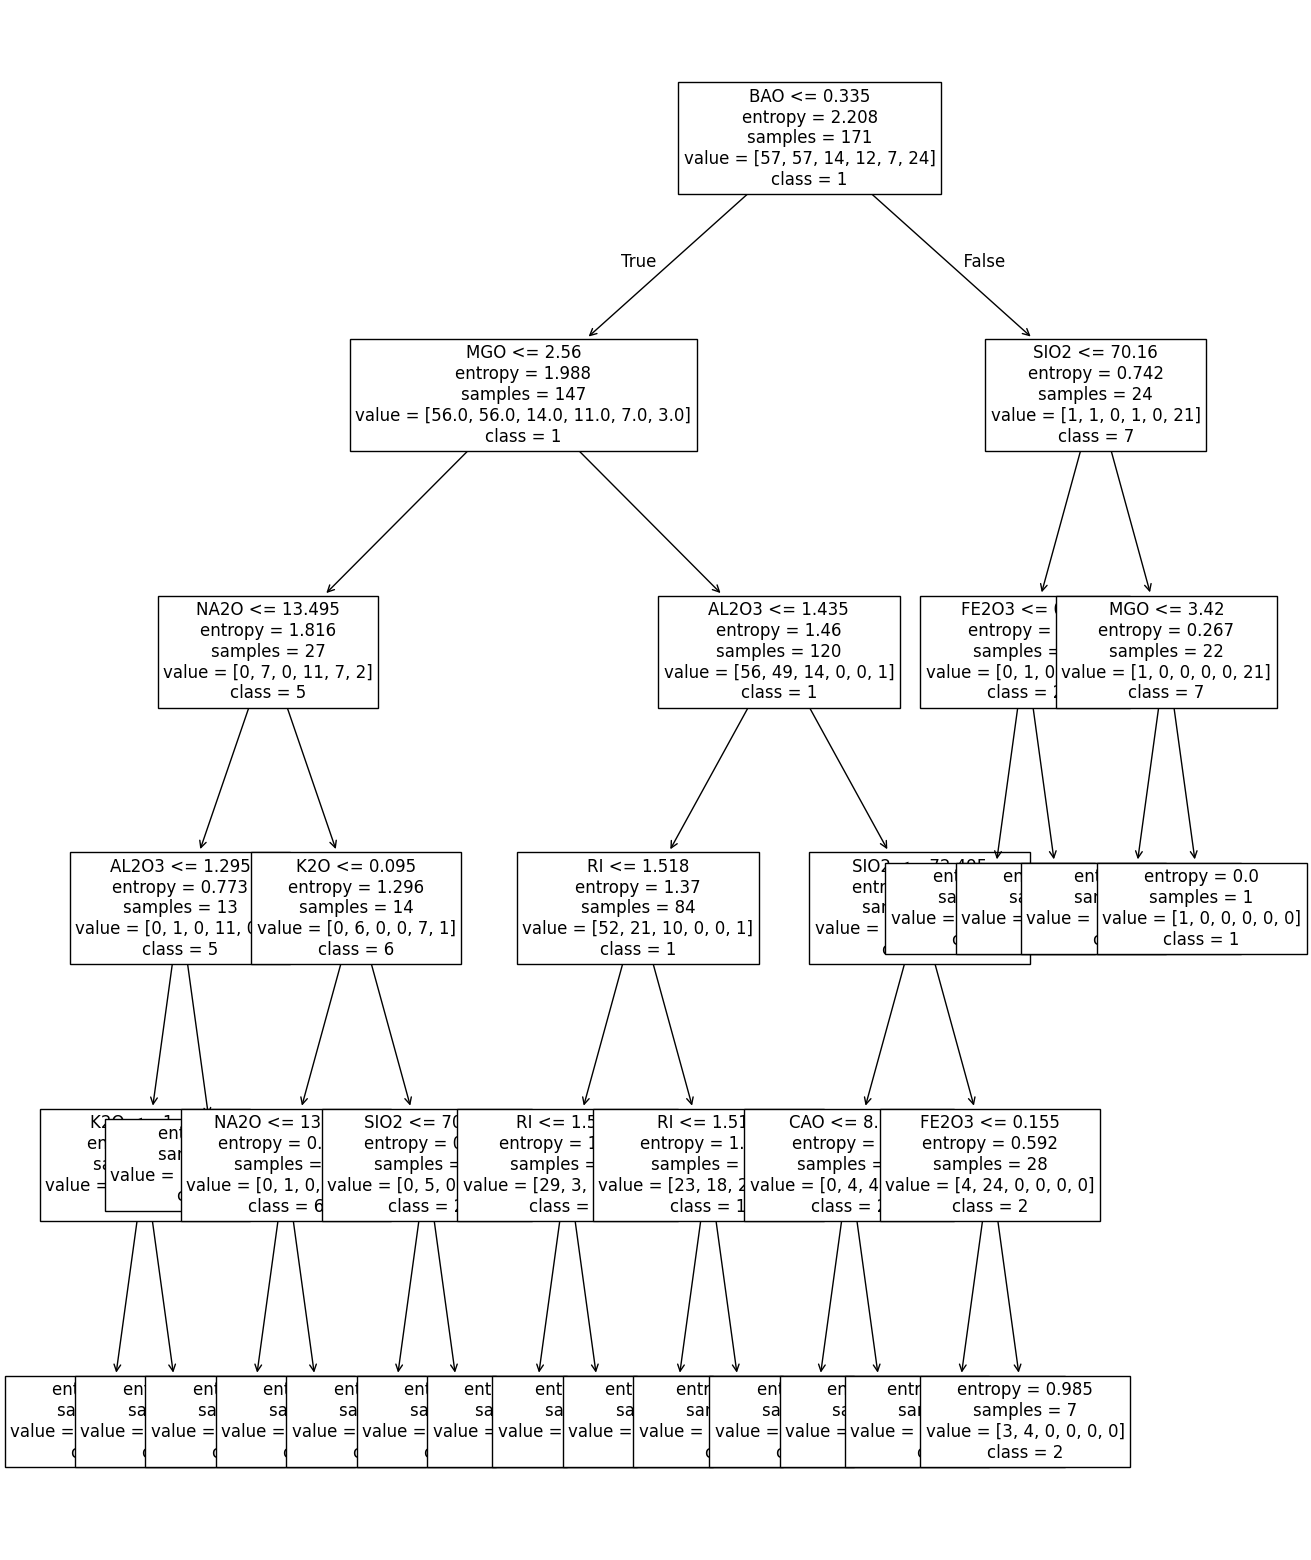

In [185]:
plt.figure(figsize=(15, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=y.astype(str).unique(),
    fontsize=12
)

In [186]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7674418604651163

In [187]:
importancias = clf.feature_importances_
importancias

array([0.14103657, 0.08661221, 0.25391028, 0.11233407, 0.08522318,
       0.04090869, 0.02751769, 0.23226574, 0.02019157])

In [188]:
importancias_df = pd.DataFrame(
    {'feature': X.columns, 'importance': importancias}
)
importancias_df = importancias_df.sort_values('importance', ascending=False)
importancias_df

,feature,importance
2,MGO,0.253910
7,BAO,0.232266
0,RI,0.141037
3,AL2O3,0.112334
1,NA2O,0.086612
4,SIO2,0.085223
5,K2O,0.040909
6,CAO,0.027518
8,FE2O3,0.020192


In [189]:
k = 4
mejores = importancias_df['feature'].head(k).values
mejores

array(['MGO', 'BAO', 'RI', 'AL2O3'], dtype=object)

In [190]:
X_mejorado = X[mejores]
X_mejorado

,MGO,BAO,RI,AL2O3
0,4.49,0.00,1.52101,1.10
1,3.60,0.00,1.51761,1.36
2,3.55,0.00,1.51618,1.54
3,3.69,0.00,1.51766,1.29
4,3.62,0.00,1.51742,1.24
...,...,...,...,...
209,0.00,1.06,1.51623,2.88
210,0.00,1.59,1.51685,1.99
211,0.00,1.64,1.52065,2.02
212,0.00,1.57,1.51651,1.94


In [191]:
X_train_mejorado, X_test_mejorado, y_train, y_test = train_test_split(X_mejorado, y, test_size=0.2, random_state=23)

In [192]:
svc = SVC(kernel='linear')

In [193]:
svc.fit(X_train_mejorado, y_train)

SVC(kernel='linear')

In [194]:
y_pred = svc.predict(X_test_mejorado)
accuracy_score(y_test, y_pred)

0.7441860465116279